## Statistical Mechanics - Distributions: FD, MB, EB
K. Makulowich September 30, 2020 University of Toronto For technical issues: k.makulowich@mail.utoronto.ca

In the previous module, we looked at the density of states function which described the available states as a function of energy. In this module, we will look at how particles occupy these available states by describing different distribution functions. Deciding which statistics to use to describe the probability distribution of a system depends on the nature of the particles.

Maxwell-Boltzmann statistics: MB statistics describe a system composed of distinguishable and identifiable particles. This distribution is commonly used to describe the energy of atoms or molecules in an contained, ideal gas. This is commonly referred to as 'classical statistics' since particles are distinguishable.

$f(\epsilon,T)_{MB} = exp\left(-\frac{\epsilon}{k_BT}\right)$

Fermi-Dirac statistics: FD statistics describe a system that is composed of indistinguishable particles which obey the Pauli exclusion principle. This implies that no two particles can occupy the same energy state. These particles are Fermions which have half-spin. Common fermions are electrons and holes.

$f(\epsilon, T)_{FD} = \frac1{exp\left(\frac{\epsilon-A}{k_BT}\right)+1}$

Bose-Einstein statistics: BE statistics describe a system of indistinguishable particles which do not follow the Pauli exclusion principle and have full integer spin. Any number of these particles can occupy the same energy state. These particles are known as bosons and common examples include phonons and photons. 

$f(\epsilon,T)_{BE} = \frac1{exp\left(\frac{\epsilon-A}{k_BT}\right)-1}$

In the following figure, all three distributions are shown as a function of energy ($\frac{\epsilon}{k_B}$ $[=]$  K). The slider controls the temperature. View how each of the distributions responds to changing temperature.

<IPython.core.display.Javascript object>


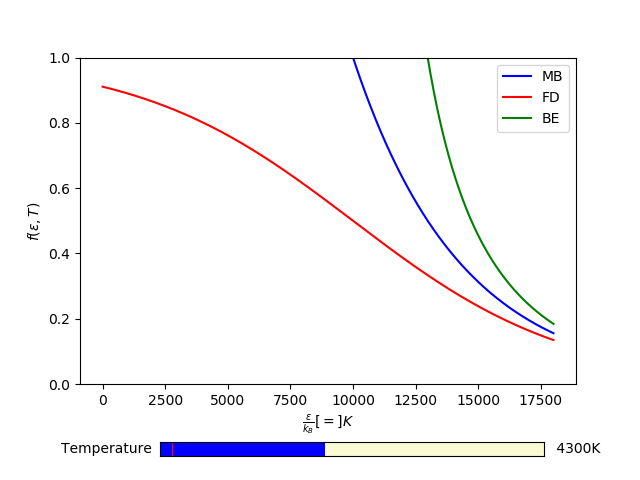

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
plt.subplots_adjust(bottom=0.2)

EkB = np.linspace(0,18000, 100000) #Kelvin

#Set initial temp to around room temp
T0 = 300 # Kelvin
AkB = 10000

#Maxwell-Boltzmann
MB0 = np.exp(-(EkB-AkB)/T0)

#Fermi Dirac
FD0 = (np.exp((EkB - AkB)/T0)+1)**(-1)

#Bose Einstein
BE0 = (np.exp((EkB  - AkB)/T0)-1)**(-1)

mb, = ax1.plot(EkB, MB0, 'blue')
fd, = ax1.plot(EkB, FD0, 'red')
be, = ax1.plot(EkB, BE0, 'green')

#Set up graph
ax1.set(xlabel=r'$\frac{\epsilon}{k_B}[=]K$', ylabel=r'$f(\epsilon, T)$', ylim=(0,1))
ax1.legend(['MB', 'FD', 'BE'], loc = 'upper right')

axcolor = 'lightgoldenrodyellow'
axL = plt.axes([0.25, 0.05, 0.60, 0.03], facecolor=axcolor)

sL = Slider(axL, 'Temperature', 0,10000, valinit=300, valstep = 100, valfmt= ' %0.fK', facecolor='blue')

def update(val):
    T = sL.val
    mb.set_ydata(np.exp(-(EkB-AkB)/T))
    fd.set_ydata((np.exp((EkB - AkB)/T)+1)**(-1))
    be.set_ydata((np.exp((EkB  - AkB)/T)-1)**(-1))
    
    fig1.canvas.draw_idle()
    
sL.on_changed(update)


plt.show()